#### Домашнее задание 2
Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

In [160]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils import plot_model
from operator import itemgetter, attrgetter, methodcaller

In [2]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

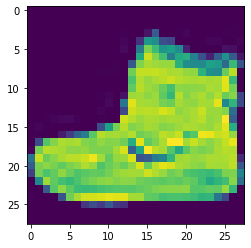

In [3]:
plt.imshow(train_images[0,:,:])
plt.show()

In [4]:
# Normalize the images.
train_images = (train_images / 127) - 1
test_images = (test_images / 127) - 1

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [11]:
# model1.summary()
# plot_model(model1, to_file='model.png')
# model1.get_config()

In [120]:
n_class = pd.DataFrame(train_labels)[0].value_counts()
n_class.index

UInt64Index([9, 8, 7, 6, 5, 4, 3, 2, 1, 0], dtype='uint64')

In [131]:
def model(train_images, train_labels, test_images, test_labels, n_layers, n_neurons,  n_epochs, i_optim, plot = 0):
    
    # вектор для выводв результатов
    epoch = np.arange(n_epochs)
    
    model = Sequential(name='my_model')
    for i in range(n_layers-1):
        model.add(Dense(n_neurons, activation='relu', input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))  
    
#     # сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
#     model.save_weights('model.h5')
    
#     # загружаем веса modeli.load_weights('model.h5')
#     modeli.load_weights('model.h5')
    
    # компилируем modeli с одним из оптимизаторов
    model.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
   
    # проводим обучение модели 
    hh = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=epochs,
    batch_size=32, validation_split=0.2, verbose = 0
    )
    
    hh_train = model.evaluate(train_images, to_categorical(train_labels), verbose=0)
    hh_test = model.evaluate(test_images, to_categorical(test_labels), verbose=0)
    if plot == 1:
        # картинки
        plt.figure(figsize=(16,7))
        plt.plot(epoch, hh.history['accuracy'],'-',label = model.optimizer.get_config()['name']+' train_accuracy')
        plt.plot(epoch, [hh_test[1]]*n_epochs,'-',label = model.optimizer.get_config()['name']+' test_accuracy')

        plt.legend()
        plt.title('нейросети от оптимизатора log(loss)')
        plt.xlabel('epoch')
        plt.xlabel('log(loss)')
        plt.show()
    
    return hh_train[1], hh_test[1]

#### 1.1  Опишите - какой результата получен в нейросети в зависимости от числа нейронов в слое(для 2-хслойной сети) 

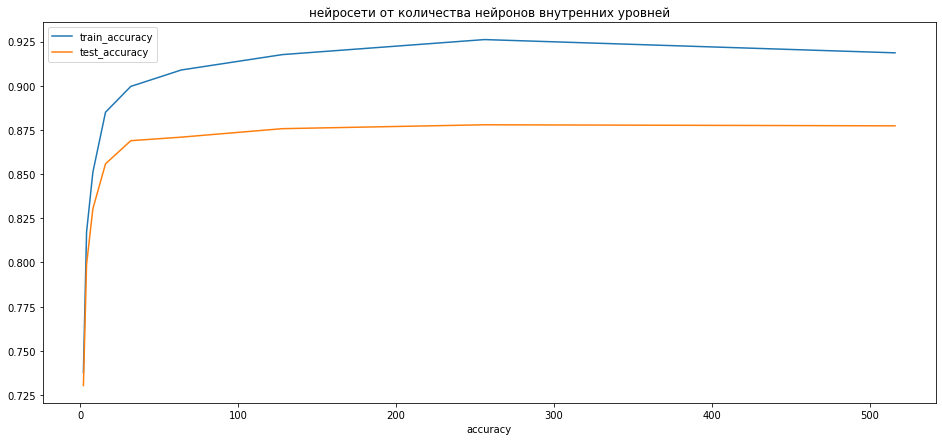

In [134]:
accur_list = []
for i in [2,4,8,16,32,64,128,256,512]:
    acc_train, acc_test = model(train_images, train_labels, test_images, test_labels, 2, i, 15, keras.optimizers.Adam(), 0)
    accur_list.append([i, round(acc_train,4), round(acc_test,4)])
acc_arr = np.array(accur_list)
plt.figure(figsize=(16,7))
plt.plot(acc_arr[:,0], acc_arr[:,1],'-',label = 'train_accuracy')
plt.plot(acc_arr[:,0], acc_arr[:,2],'-',label = 'test_accuracy')

plt.legend()
plt.title('нейросети от количества нейронов внутренних уровней')
plt.xlabel('количество нейронов')
plt.xlabel('accuracy')
plt.show()

#### Результат - Чем больше нейронов во внутренних слоях 2-х слойной сети тем больше точность

#### 1.2.  Опишите - какой результата получен в нейросети в зависимости от числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).

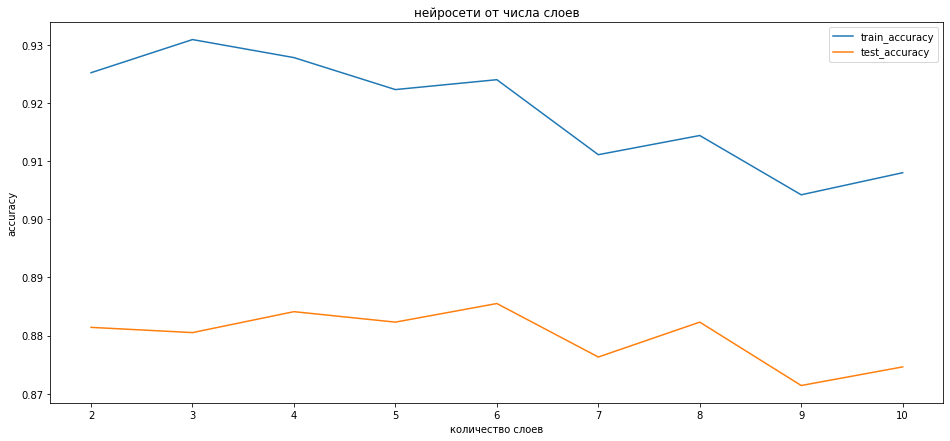

In [169]:
accur_list = []
for i in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    acc_train, acc_test = model(train_images, train_labels, test_images, test_labels, i, 256, 15, keras.optimizers.Adam(), 0)
    accur_list.append([i, round(acc_train,4), round(acc_test,4)])
acc_arr = np.array(accur_list)
plt.figure(figsize=(16,7))
plt.plot(acc_arr[:,0], acc_arr[:,1],'-',label = 'train_accuracy')
plt.plot(acc_arr[:,0], acc_arr[:,2],'-',label = 'test_accuracy')

plt.legend()
plt.title('нейросети от числа слоев')
plt.xlabel('количество слоев')
plt.ylabel('accuracy')
plt.show()

#### Результат - самый лучший результат 3 слоя, но тут есть зависимость и от исходных весов. Однако, мы каждый раз формируем новую структуру сети и не можем сохранять и загрузить исходные веса при изменении количества слоев. Такое сравнение не достоверно. Повидимому тут нужно отдельно для каждого слоя соранять веса и подгружать их при уваеличесния слоев. Но это усложнит код.

#### 2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [167]:
def model_optim(train_images, train_labels, test_images, test_labels, n_layers, n_neurons,  n_epochs, optims):
    
    # вектор для выводв результатов
    epoch = np.arange(n_epochs)
    
    model = Sequential(name='my_model')
    for i in range(n_layers-1):
        model.add(Dense(n_neurons, activation='relu', input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))  
    
    # сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
    model.save_weights('model.h5')
    accur_list = []
    
    for opt in optims:
        modeli = Sequential(name='my_model')
        for i in range(n_layers-1):
            modeli.add(Dense(n_neurons, activation='relu', input_shape=(784,)))
        modeli.add(Dense(10, activation='softmax'))  
        
        # загружаем веса modeli.load_weights('model.h5')
        modeli.load_weights('model.h5')
        
        # компилируем modeli с одним из оптимизаторов
        modeli.compile(
          optimizer=opt,
          loss='categorical_crossentropy',
          metrics=['accuracy'],
          )

        
        # проводим обучение модели 
        hh = modeli.fit(
        train_images,
        to_categorical(train_labels),
        epochs=epochs,
        batch_size=32, validation_split=0.2, verbose = 0
        )

        hh_train = modeli.evaluate(train_images, to_categorical(train_labels), verbose=0)
        hh_test = modeli.evaluate(test_images, to_categorical(test_labels), verbose=0)
        accur_list.append([modeli.optimizer.get_config()['name'], round(hh_train[1],4), round(hh_test[1],4)])
    sorted(accur_list, key=itemgetter(2))
    print(accur_list)
    acc_arr = np.array(accur_list)
    plt.figure(figsize=(16,7))
    plt.plot(acc_arr[:,0], acc_arr[:,1],'-',label = 'train_accuracy')
    plt.plot(acc_arr[:,0], acc_arr[:,2],'-',label = 'test_accuracy')

    plt.legend()
    plt.title('нейросети от типа оптимизатора')
    plt.xlabel('тип оптимизатора')
    plt.ylabel('accuracy')
    plt.show()

[['RMSprop', 0.8997, 0.8654], ['SGD', 0.9075, 0.8735], ['Adam', 0.9242, 0.8756], ['Nadam', 0.935, 0.8853]]


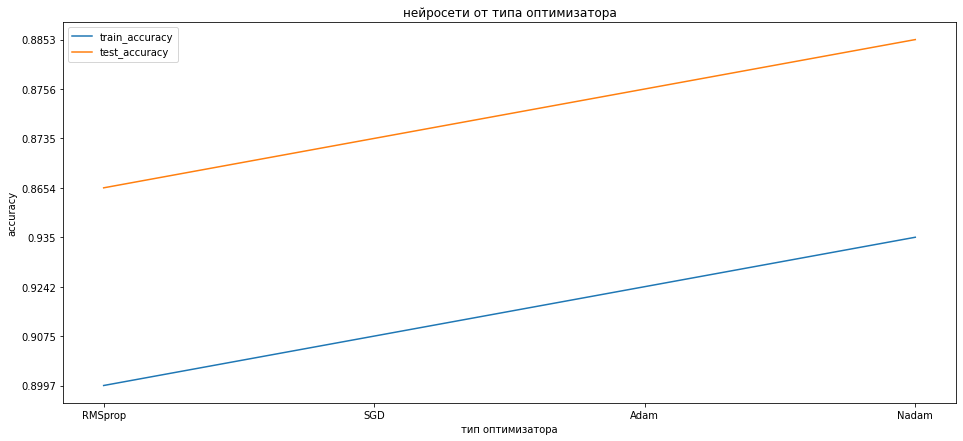

In [168]:
optim_list = [keras.optimizers.RMSprop(),keras.optimizers.SGD(),keras.optimizers.Adam(),keras.optimizers.Nadam()]
n_layers = 3
n_neurons = 256
n_epochs = 15
model_optim(train_images, train_labels, test_images, test_labels, n_layers, n_neurons,  n_epochs, optim_list)

#### 3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

качество классификации в нейросети на тестовом наборе можно улучшить подбором параметов: количество слоев, количество нейронов в слоях и тип оптимизации. Оптимальные значения параметров из вышеуказанных исследований следующий:
- количество слоев - 3 
- количество нейронов в слоях - 256
- тип оптимизации - Nadam

#### 4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

In [203]:
from sklearn.metrics import classification_report

In [210]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [211]:
def model_class(train_images, train_labels, test_images, test_labels, n_layers, n_neurons,  n_epochs, i_optim, plot = 0):
    
    # вектор для выводв результатов
    epoch = np.arange(n_epochs)
    
    model = Sequential(name='my_model')
    for i in range(n_layers-1):
        model.add(Dense(n_neurons, activation='relu', input_shape=(784,)))
    model.add(Dense(10, activation='softmax'))  

    # компилируем model с одним из оптимизаторов
    model.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
   
    # проводим обучение модели 
    hh = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=epochs,
    batch_size=32, validation_split=0.2, verbose = 0
    )
    
    hh_train = model.evaluate(train_images, to_categorical(train_labels), verbose=0)
    hh_test = model.evaluate(test_images, to_categorical(test_labels), verbose=0)
    if plot == 1:
        # картинки
        plt.figure(figsize=(16,7))
        plt.plot(epoch, hh.history['accuracy'],'-',label = model.optimizer.get_config()['name']+' train_accuracy')
        plt.plot(epoch, [hh_test[1]]*n_epochs,'-',label = model.optimizer.get_config()['name']+' test_accuracy')

        plt.legend()
        plt.title('нейросети от оптимизатора log(loss)')
        plt.xlabel('epoch')
        plt.xlabel('log(loss)')
        plt.show()
    
    
#     y_true = test_labels
#     y_pred = modeli.predict(test_images)
#     y_pred_class = np.argmax(y_pred,axis=1)
#     labels = list(pd.DataFrame(test_labels)[0].value_counts().index).sort()

#     print(classification_report(y_true, y_pred_class, labels=labels))
    
    y_train_true = train_labels
    y_train_pred = np.argmax(modeli.predict(train_images),axis=1)
    
    y_test_true = test_labels
    y_test_pred = np.argmax(modeli.predict(test_images),axis=1)
    
    get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred)
    
    return model

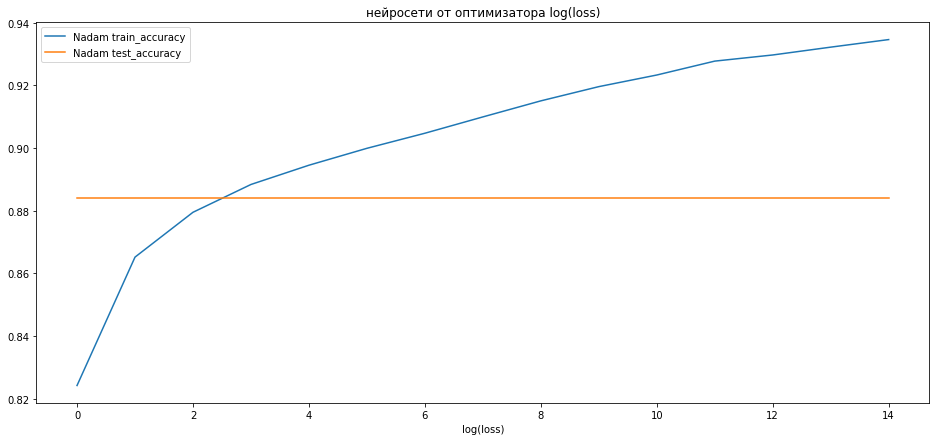

TRAIN

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      6000
           1       1.00      0.98      0.99      6000
           2       0.86      0.86      0.86      6000
           3       0.91      0.93      0.92      6000
           4       0.85      0.87      0.86      6000
           5       0.96      0.99      0.98      6000
           6       0.78      0.80      0.79      6000
           7       0.96      0.96      0.96      6000
           8       0.98      0.99      0.99      6000
           9       0.98      0.96      0.97      6000

    accuracy                           0.92     60000
   macro avg       0.92      0.92      0.92     60000
weighted avg       0.92      0.92      0.92     60000

TEST

              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.80      0.80      1000
           

In [212]:
optim = keras.optimizers.Nadam()
n_layers = 3
n_neurons = 256
n_epochs = 15

model = model_class(train_images, train_labels, test_images, test_labels, n_layers, n_neurons,  n_epochs, optim, plot = 1)